## MINIST Dataset

In [ ]:
# Import the libraries and load the dataset.

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,  Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [ ]:
# Spliting data between train and test sets

(x_train, y_train), (x_test, y_test) = mnist.load_data ()

print(x_train.shape, y_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [ ]:
import numpy as np
#Convert class vectors to binary class matrices

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

y_train = keras.utils.to_categorical(y_train, num_classes = 10)
y_test = keras.utils.to_categorical(y_test, num_classes = 10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
#Creating CNN Model

batch_size = 128
num_classes = 10
epochs = 35

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [ ]:
# Train the Model

hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/35
469/469 [==============================] - 159s 338ms/step - loss: 2.2744 - accuracy: 0.1725 - val_loss: 2.2280 - val_accuracy: 0.4069
Epoch 2/35
469/469 [==============================] - 155s 330ms/step - loss: 2.1949 - accuracy: 0.3269 - val_loss: 2.1278 - val_accuracy: 0.6069
Epoch 3/35
469/469 [==============================] - 155s 330ms/step - loss: 2.0875 - accuracy: 0.4566 - val_loss: 1.9878 - val_accuracy: 0.6837
Epoch 4/35
469/469 [==============================] - 156s 334ms/step - loss: 1.9373 - accuracy: 0.5360 - val_loss: 1.7927 - val_accuracy: 0.7246
Epoch 5/35
469/469 [==============================] - 157s 335ms/step - loss: 1.7395 - accuracy: 0.5911 - val_loss: 1.5468 - val_accuracy: 0.7517
Epoch 6/35
469/469 [==============================] - 157s 335ms/step - loss: 1.5128 - accuracy: 0.6318 - val_loss: 1.2869 - val_accuracy: 0.7760
Epoch 7/35
469/469 [==============================] - 158s 337ms/step - loss: 1.3004 - accuracy: 0.6640 - val_loss: 1.0630 -

In [ ]:
# Evaluate the Model

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3085572123527527
Test accuracy: 0.911300003528595


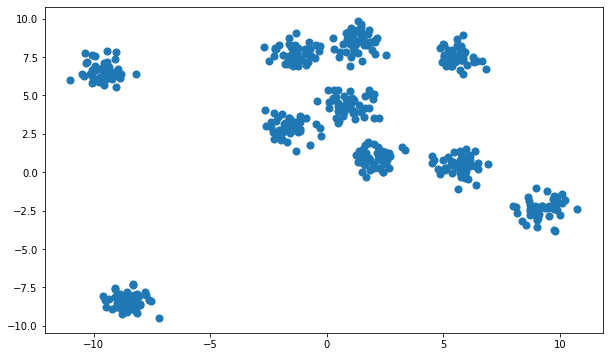

In [ ]:
# Applying k-means Clustering

import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

features, label = make_blobs(n_samples=500, centers=10,
                       cluster_std=0.55, random_state=0)
plt.figure(figsize=(10, 6))
plt.scatter(features[:, 0], features[:, 1], s=50);

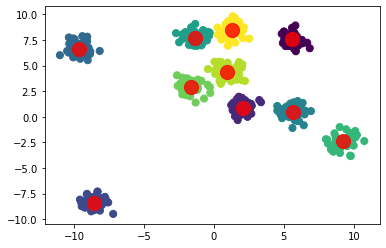

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(features)
kmeansLabels = kmeans.predict(features)
plt.scatter(features[:, 0], features[:, 1], c=kmeansLabels, s=50, cmap='viridis')

clusterCenters = kmeans.cluster_centers_
plt.scatter(clusterCenters[:, 0], clusterCenters[:, 1], c='red', s=200, alpha=0.8)